# Estudo definitivo
## Previous submission 0.74

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

## Análise exploratória

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
### Taking a more closer look to the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [7]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# é possivel perceber vários valores nulos/Nan

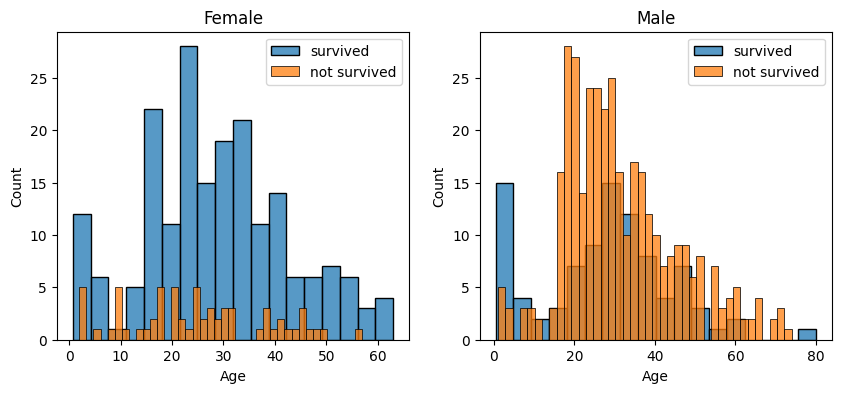

In [35]:
# Age and Sex
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [10]:
# é possivel perceber nos gráfico que temos a maior taxa de sobrevivência feminina entre os 20 e 40 anos
# para homens essa faixa fica entre 20 e 30 anos

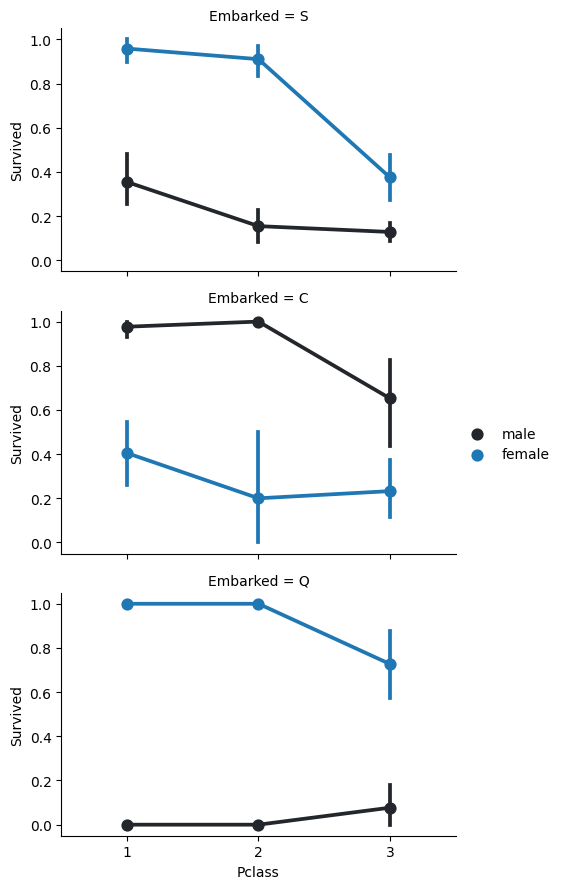

In [24]:
## Embarked, Pclass and Sex

FacetGrid = sns.FacetGrid(train_df, row='Embarked',  aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

In [495]:
# Mulheres que embarcaram no porto Q e S tem maiores chances de sobrevivencia que homens nos respectivos portos
# Isso ocorre de modo inverso no porto C
# Como a classe aparenta apresertar correlação segue um gráfico comprovatório a seguir

<Axes: xlabel='Pclass', ylabel='Survived'>

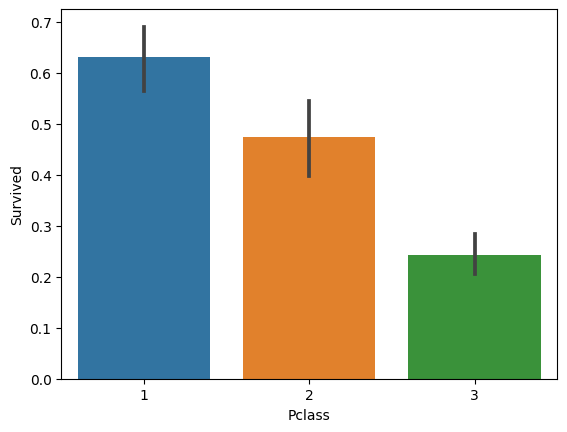

In [13]:
## Pclass

sns.barplot(x='Pclass', y='Survived', data=train_df)

In [14]:
## SibSp and Parch
## faz sentido combinar essas duas features visto que ambos apresentam uma relação familiar.

data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

not_alone
1    537
0    354
Name: count, dtype: int64

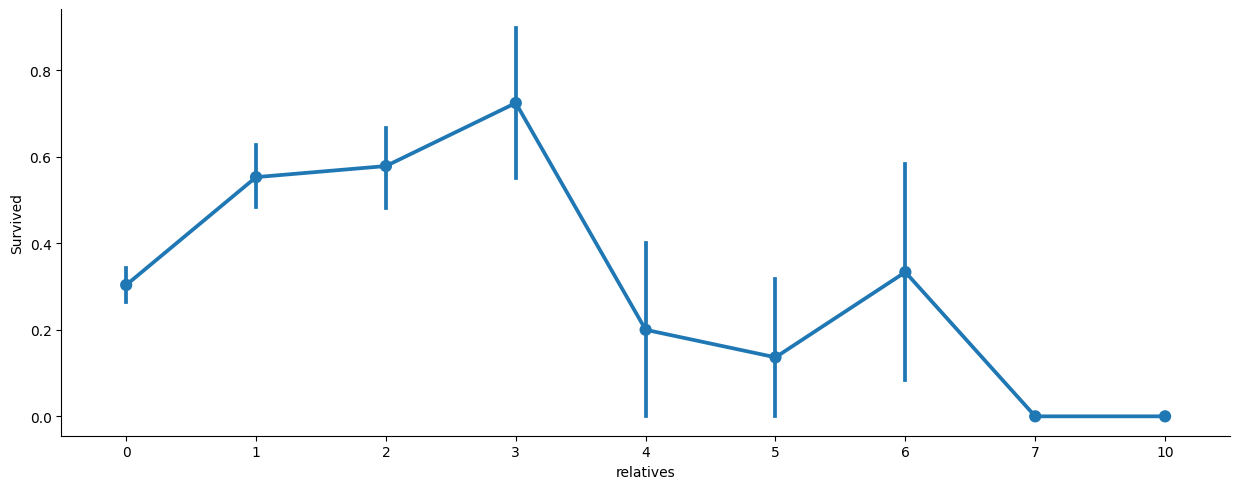

In [23]:
axes = sns.catplot(x='relatives',y='Survived', 
                      data=train_df, aspect = 2.5, kind='point' )

In [25]:
# Se torna claro que pessoas que viajavam com 1 a 3 parentes são mais propensas a sobreviver
# O aumento de familiares também aparenta estar relacionado a redução do indice de sobrevivência

## Processamento dos dados

In [26]:
## A identificação do passageiro não apresenta correlação com os dados e por isso será desconsiderada

In [27]:
train_df = train_df.drop('PassengerId', axis=1)

In [502]:
## Dados Faltantes

In [503]:
# Cabin
# É interressante tratar e utilizar essa feature pois a letral inicial indica o deck em que o passageiro se encontrava
# As iniciais serão transformadas em números e os valores faltantes substituidos por zero

In [ ]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# Agora dropar o valor Cabin
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [505]:
# Age
# Ao invés de simplesmente utilizar um .fillna() 
# iremos substituir os valores faltantes utilizando a relação entre a média e o desvio e nulo

In [37]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # computando os valores utilizando média desvio e is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # preenchendo os valores
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()

0

In [38]:
# A numeração do ticket não será considerada

train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [508]:
# Embarked possui apenas 2 valores vazios, então é prudente preeche-los utilizando o valor mais comum

In [39]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [40]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [511]:
## Convertendo os Valores

In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int32  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Fare       891 non-null    float64
 8   Embarked   891 non-null    object 
 9   relatives  891 non-null    int64  
 10  not_alone  891 non-null    int32  
 11  Deck       891 non-null    int32  
dtypes: float64(1), int32(3), int64(5), object(3)
memory usage: 73.2+ KB


In [513]:
### temos de lidar com 4 dados categóricos e com um float

In [514]:
# Fare de float para int64

data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [515]:
# Name
### titulos podem apresentar correlações: por exemplo militares que são instruídos a ajudar civis etc

data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extrair títulos
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # Substituir títulos incomuns por Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    # Substituir títulos em outros idiomas ou grafias pelo padrão americano
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # Converter em números
    dataset['Title'] = dataset['Title'].map(titles)
    # Preenchendo NaN com 0
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

<AxesSubplot:>

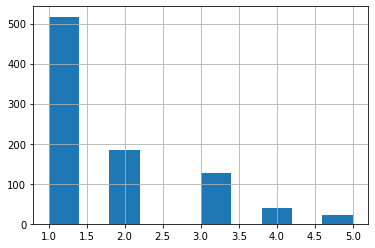

In [516]:
train_df['Title'].hist()

In [517]:
#Sex
# Converter Sex em númerico

genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [518]:
# Embarked ; converter em numérico

ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [519]:
# Uma estratégia interessante, e ainda dividir essas features em subgrupos para facilitar a identificação pelo modelo 
# visto que possuimos uma amostra pequena e que provavelmente sofreria com underfitting 

In [520]:
# Dividindo as pessoas por idades

data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# Observe as distribuições
#train_df['Age'].value_counts()

In [521]:
# Em vias de experimentação serão criados mais 2 features para o modelo Age*Class e Fare/Person
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [522]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,7,0,1,0,8,1,6,3
1,1,1,1,5,1,0,71,1,1,0,3,3,5,35
2,1,3,1,3,0,0,7,0,0,1,8,2,9,7
3,1,1,1,5,1,0,53,0,1,0,3,3,5,26
4,0,3,0,5,0,0,8,0,0,1,8,1,15,8
5,0,3,0,1,0,0,8,2,0,1,8,1,3,8
6,0,1,0,6,0,0,51,0,0,1,5,1,6,51
7,0,3,0,0,3,1,21,0,4,0,8,4,0,4
8,1,3,1,3,0,2,11,0,2,0,8,3,9,3
9,1,2,1,1,1,0,30,1,1,0,8,3,2,15


In [523]:
# Finalmente iremos treinar vários modelos de ML e compará-los para selecionar o melhor

In [524]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,3,0,2,0,0,7,2,0,1,8,1,6,7
1,3,1,5,1,0,7,0,1,0,8,3,15,3
2,2,0,3,0,0,9,2,0,1,8,1,6,9
3,3,0,5,0,0,8,0,0,1,8,1,15,8
4,3,1,5,1,1,12,0,2,0,8,3,15,4


In [525]:
# Stochastic Gradient Descent (SGD):

In [526]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [527]:
# Random Forest

In [528]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [529]:
# Logistic Regression

In [530]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

C:\Users\samuc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [531]:
# K Nearest Neighbor:

In [532]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [533]:
# Gaussian Naive Bayes:

In [534]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [535]:
# Perceptron:

In [536]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

C:\Users\samuc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [537]:
# Linear Support Vector Machine:

In [538]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

C:\Users\samuc\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [539]:
# Decision Tree

In [540]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [541]:
# E qual foi o melhor modelo ?

results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
94.61,Random Forest
94.61,Decision Tree
85.97,KNN
80.81,Logistic Regression
77.33,Naive Bayes
76.66,Support Vector Machines
76.21,Perceptron
71.72,Stochastic Gradient Decent


In [542]:
# Podemos observar que nesse primeiro momento a Ramdom Forest e Arvore de decisão performam melhor
# Contudo podemos utilzar um Repeated K-fold para segmentar o conjunto de dados e utilizar uma validação mais robusta

Mean: 0.8294257178526842
Standard Deviation: 0.03842501327435806


(array([1., 0., 0., 0., 1., 2., 2., 0., 2., 2.]),
 array([0.74157303, 0.75505618, 0.76853933, 0.78202247, 0.79550562,
        0.80898876, 0.82247191, 0.83595506, 0.8494382 , 0.86292135,
        0.87640449]),
 <BarContainer object of 10 artists>)

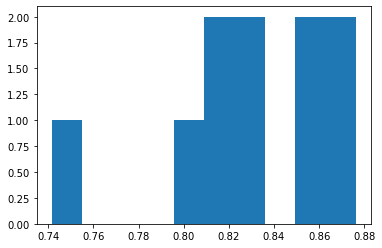

In [543]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
pylab.hist(scores)

In [544]:
# com uma média de 82% mais realista que a anterior podemos agora estimar a importância de cada feature

In [545]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Sex,0.178
Title,0.170
Fare,0.125
Fare_Per_Person,0.116
Age_Class,0.081
Age,0.063
Deck,0.060
Pclass,0.056
relatives,0.046


<AxesSubplot:xlabel='feature'>

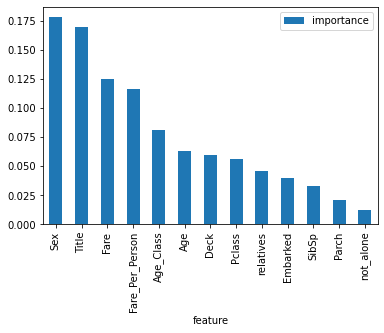

In [546]:
importances.plot.bar()

In [547]:
# not_alone e Parch praticamente não contribuem para o modelo e por isso serão dropadas

In [548]:
train_df  = train_df.drop("not_alone", axis=1)
test_df  = test_df.drop("not_alone", axis=1)

train_df  = train_df.drop("Parch", axis=1)
test_df  = test_df.drop("Parch", axis=1)

In [549]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

94.61 %


###  Quanto mais features o modelo possuir mais suscetível será ao overfitting

In [550]:
# Medindo o Out-of-Bag score ele oferece uma estimativa de generalização da RF
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 81.58999999999999 %


## Configuração de hiperparâmetros

In [ ]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)
clf.bestparams

In [551]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 83.73 %


In [552]:
# Outras Avaliações

In [553]:
#Confusion Matrix:

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[491,  58],
       [ 94, 248]], dtype=int64)

In [554]:
# Precision and Recall:

from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.8104575163398693
Recall: 0.7251461988304093


In [555]:
# F-Score

from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.7654320987654322

In [556]:
# ROC AUC Score
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9513762396276058


## Criar Submission

In [557]:
sub = pd.Series(Y_prediction , index=test_df['PassengerId'], name ='Survived')

In [558]:
sub.to_csv('Estudo Final.csv',header=True)

In [559]:
with open("Estudo Final.csv") as f:
    for _ in range(10): # first 10 lines
        print(f.readline())

PassengerId,Survived

892,0

893,0

894,0

895,0

896,0

897,0

898,1

899,0

900,1

